In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [7]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Standardize the features

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues: \n%s' % eigen_vals)


Eigenvalues: 
[4.8130367  2.58369088 1.58384332 0.81421694 0.66020284 0.70663334
 0.10479856 0.16581699 0.20234218 0.36368036 0.285281   0.26738813
 0.55475981]


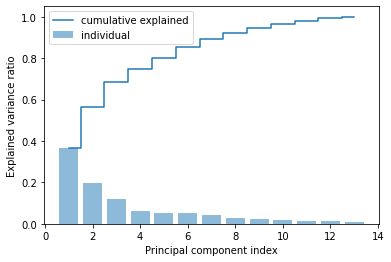

In [12]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')

In [17]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
# What is the dimension of the projection Matrix W?
print('Matrix W:\n', w)

Matrix W:
 [[-0.18694186 -0.4559711 ]
 [ 0.22097508 -0.29322079]
 [-0.00847974 -0.27624199]
 [ 0.24676687  0.00550464]
 [-0.16111087 -0.31305985]
 [-0.39542261 -0.06527145]
 [-0.41460163  0.03098889]
 [ 0.30445619 -0.03648379]
 [-0.31989238 -0.02729476]
 [ 0.0693826  -0.52250076]
 [-0.27672191  0.32427885]
 [-0.35906909  0.1780053 ]
 [-0.30935808 -0.33855436]]


In [18]:
X_train_std[0].dot(w)

array([-2.06588723, -1.0723034 ])

In [19]:
X_train_pca = X_train_std.dot(w)

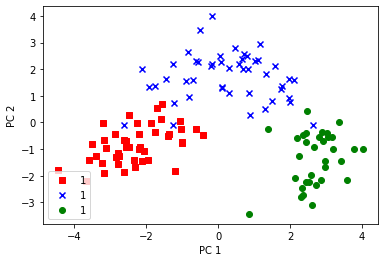

In [22]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=1,marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()